In [156]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import zipfile
import io
import requests

# A função h calcula a hipótese de regressão linear usando o vetor de coeficientes 'theta' e os recursos 'x[i]'.

In [157]:
def h(x, i, theta):
    
    h = theta[0]
    
    for j in range(1, len(theta)):
        h += x[i][j-1] * theta[j]
    
    return h

# Implementação do algoritmo de gradiente descendente para otimizar os coeficientes 'theta'.


In [158]:
ALFA = 0.0000001

eixo_X = []
eixo_Y = []

def gradiente_descendente(x,y,theta):
    #temp = [0] * len(theta)    # Lista temporária para armazenar os novos valores de theta
    
    m = len(x)              # Número de exemplos de treinamento
    n = len(theta)          # Número de coeficientes theta
    
    #max_diff = 10
    ite = 0
    while ite < 60000:   # Critério de parada: diferença máxima entre os valores antigos e novos de theta  
        eixo_Y.append(ite)
        custo = 0
        for i in range(m):    # Loop sobre os exemplos de treinamento
            hip = h(x, i, theta)    # Calcula a hipótese para o exemplo i
            custo += hip - y[i]  
        
        custo = 1/m * custo     
        eixo_X.append(abs(custo))
        
        theta[0] = theta[0] - ALFA * custo  # Atualiza temp[0] usando a taxa de aprendizado
        for j in range(1, n):
            theta[j] = theta[j] - ALFA * custo * x[i][j-1]   
        
        ite += 1

In [159]:
def solucao_analitica(x,y,theta):
    m = len(y)
    
    xt =  x.transpose()
    
    theta[:] = (2/m) * np.linalg.pinv(xt @ x) @ xt @ y
    

In [160]:
class LMSTrainer(BaseEstimator):
    
    def __init__(self, analitic=False):
            
        self.analitic = analitic
        self._trained = False
            
    def fit(self, X, theta,y=None):
        if self.analitic:
            
            coluna_um = [1] * len(y)
            x2 = np.insert(X, 0, coluna_um, axis=1)
            
            solucao_analitica(x2,y,theta)
            
        else:
            gradiente_descendente(X,y, theta)
        
        self._trained = True
        
        return self
        
    def predict(self, X, theta, y=None):
        
        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")
        
        teste = [0] * len(y)
        gab = [0] * len(y)
        for i in range(len(y)):
            teste[i] = int(h(X, i, theta))
            gab[i] = y[i]
        

        print("Teste:")
        print(teste)
        print("Gabarito:")
        print(gab)

# DataFrame : https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume
# Normalizando DataFrame

In [161]:
# URL direto para o arquivo ZIP
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Baixar o arquivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Escolher o arquivo CSV a ser lido (por exemplo, 'winequality-red.csv')
file_to_read = 'winequality-red.csv'

# Ler o arquivo CSV dentro do ZIP
df = pd.read_csv(zip_file.open(file_to_read),sep=";")


df['target_column'] = df['quality']  # Renomeando a coluna alvo
df = df.drop('quality', axis=1)      # Remocendo a coluna antiga 

#print(df)

12
Teste:
[7, 10, 4, 4, 5, 9, 5, 5, 6, 4, 4, 4, 7, 5, 4, 5, 5, 4, 6, 7, 6, 4, 4, 5, 5, 6, 4, 4, 5, 4, 4, 5, 4, 7, 5, 5, 4, 4, 5, 5, 4, 5, 3, 4, 6, 4, 5, 6, 7, 7, 8, 4, 5, 4, 6, 4, 4, 4, 4, 5, 6, 4, 5, 5, 6, 5, 5, 7, 7, 6, 4, 5, 4, 6, 6, 5, 4, 5, 4, 4, 4, 4, 4, 7, 6, 5, 4, 4, 8, 5, 6, 4, 4, 5, 4, 4, 6, 5, 4, 5, 4, 5, 7, 6, 5, 5, 4, 5, 4, 4, 4, 7, 4, 6, 4, 6, 4, 4, 7, 6, 5, 4, 4, 5, 4, 9, 5, 5, 5, 4, 4, 4, 4, 9, 4, 4, 4, 7, 4, 6, 5, 5, 5, 4, 5, 8, 5, 5, 8, 4, 4, 4, 5, 6, 5, 5, 4, 5, 4, 4, 7, 4, 6, 5, 6, 5, 5, 5, 4, 6, 5, 5, 7, 7, 5, 7, 4, 5, 4, 8, 6, 6, 7, 4, 4, 6, 4, 4, 4, 6, 5, 4, 6, 4, 7, 4, 8, 4, 5, 6, 9, 4, 5, 4, 4, 5, 4, 5, 6, 5, 7, 4, 6, 4, 4, 5, 4, 9, 4, 4, 8, 6, 4, 5, 4, 4, 4, 4, 6, 5, 5, 4, 4, 4, 6, 6, 4, 4, 4, 5, 8, 6, 4, 7, 4, 4, 4, 8, 5, 4, 4, 5, 5, 4, 4, 4, 4, 7, 7, 6, 4, 7, 5, 5, 7, 4, 4, 7, 4, 4, 5, 6, 4, 8, 5, 7, 6, 5, 9, 4, 7, 8, 5, 5, 5, 5, 5, 9, 4, 4, 4, 4, 9, 4, 4, 5, 4, 6, 4, 6, 7, 4, 9, 4, 8, 6, 5, 6, 5, 5, 4, 5, 4, 4, 5, 7, 4, 7, 4, 6, 4, 7, 4, 6, 5, 4, 5, 5, 7, 4

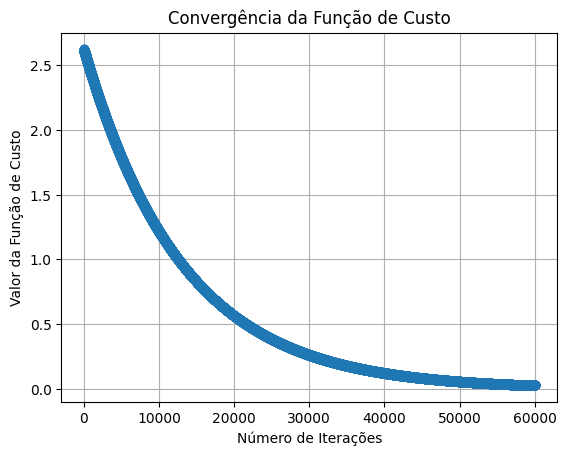

In [162]:
X = df.drop('target_column', axis=1)
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trainer = LMSTrainer()
num_columns = X.shape[1] + 1
print(num_columns)
theta = [0] * num_columns 
theta[0] = 3
predictor = trainer.fit(X_train.values, theta, y_train.values)
predictor.predict(X_train.values, theta, y_train.values)

plt.figure()
plt.plot(eixo_Y, eixo_X, marker='o', linestyle='-')
plt.title('Convergência da Função de Custo')
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Função de Custo')
plt.grid(True)
plt.show()